# Project Overview:
This project involves building a regression model that predicts an individual's salary based on their years of experience, using traditional machine learning techniques. It is a part of the AI Internship Program by Digipex Solutions LLC, focused on developing core skills in dataset handling, model training, and deployment.

# **Get the Dataset from Keggale**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("korpionn/salary-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 378/378 [00:00<00:00, 533kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/korpionn/salary-prediction-dataset/versions/1


#**Required libraries**

In [9]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit joblib

# All Required Libraries for Salary Prediction Project

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Saving
import joblib

# Web App Interface
import streamlit as st

import os



# **Load CSV from Downloaded Path**

In [14]:
# Replace with the actual filename from above
csv_path = os.path.join(path, "Salary_Data.csv")

# Load into DataFrame
df = pd.read_csv(csv_path)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Data Preprocessing (Simple)**

In [25]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

#Rename columns for consistency (strip + lowercase + replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print cleaned column names for confirmation
print("\nCleaned column names:", df.columns.tolist())

# Define Features (X) and Target (y)
X = df[['yearsexperience']]   # Features (2D)
y = df['salary']              # Target (1D)

# Final preview
df.head()


Missing values:
 yearsexperience    0
salary             0
dtype: int64

Data types:
 yearsexperience    float64
salary             float64
dtype: object

Cleaned column names: ['yearsexperience', 'salary']


,yearsexperience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Visualization: Experience vs Salary**

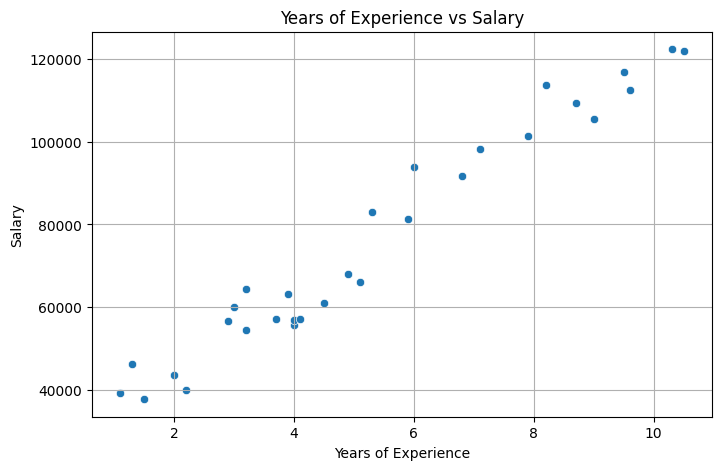

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='yearsexperience', y='salary')
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


# **Train a Regression Model (Linear Regression First)**

In [27]:
# Define X and y
X = df[['yearsexperience']]
y = df['salary']


# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Evaluate the Model**

In [28]:


# Predict on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE:  6286.45
MSE:  49830096.86
RMSE: 7059.04
R² Score: 0.90


# **Save the Trained Model**

In [29]:
import joblib

# Save your trained model to a file
joblib.dump(model, 'salary_predictor.pkl')

print("Model saved as salary_predictor.pkl")


Model saved as salary_predictor.pkl


# **Objective:**
To develop, evaluate, and deploy a salary prediction model using clean and minimal data (Years of Experience → Salary), and present it via a Streamlit web application.

# **Techniques Used:**
Data Preprocessing with pandas, numpy

Exploratory Data Analysis (EDA) using matplotlib and seaborn

Model Training using LinearRegression from scikit-learn

Model Evaluation using MAE, RMSE, R² Score

Streamlit Web App for real-time prediction

Deployment via Render

Version Control using GitHub